# BM25 Index: Theory, Implementation, and Demonstration

This notebook provides a comprehensive overview of **BM25 (Best Matching 25)** ranking function, how it works, and practical demonstrations with real implementations.

## Table of Contents
1. [What is BM25?](#what-is-bm25)
2. [Mathematical Foundation](#mathematical-foundation)
3. [BM25 vs TF-IDF Comparison](#bm25-vs-tf-idf-comparison)
4. [Step-by-Step Implementation](#step-by-step-implementation)
5. [BM25 Parameters Analysis](#bm25-parameters-analysis)
6. [Practical Applications](#practical-applications)
7. [Performance Comparison](#performance-comparison)
8. [Hybrid Search with BM25](#hybrid-search-with-bm25)

## What is BM25?

**BM25 (Best Matching 25)** is a probabilistic ranking function used to estimate the relevance of documents to a given search query. It's widely considered the **state-of-the-art** for keyword-based information retrieval.

### Key Features:
- **Probabilistic Foundation**: Based on the Binary Independence Model
- **Document Length Normalization**: Accounts for varying document lengths
- **Term Frequency Saturation**: Diminishing returns for repeated terms
- **Tunable Parameters**: `k1` and `b` for different datasets

### Use Cases:
- **Search Engines**: Primary ranking algorithm for keyword search
- **Information Retrieval**: Academic and commercial systems
- **Hybrid Search**: Combined with vector search in modern RAG systems
- **Document Ranking**: Legal, medical, and scientific document retrieval

### Why BM25 > TF-IDF:
1. **Length Normalization**: Prevents bias toward longer documents
2. **Term Saturation**: Prevents over-scoring of repeated terms
3. **Probabilistic Model**: More theoretically grounded
4. **Better Empirical Performance**: Consistently outperforms TF-IDF

## Mathematical Foundation

BM25 computes the relevance score of a document $D$ to a query $Q$ as:

$$\text{BM25}(D,Q) = \sum_{i=1}^{n} \text{IDF}(q_i) \cdot \frac{f(q_i,D) \cdot (k_1 + 1)}{f(q_i,D) + k_1 \cdot \left(1 - b + b \cdot \frac{|D|}{\text{avgdl}}\right)}$$

Where:
- $q_i$ = query terms
- $f(q_i,D)$ = term frequency of $q_i$ in document $D$
- $|D|$ = length of document $D$ in words
- $\text{avgdl}$ = average document length in the corpus
- $k_1$ = controls term frequency scaling (typically 1.2 to 2.0)
- $b$ = controls length normalization (typically 0.75)

### IDF Component:
$$\text{IDF}(q_i) = \log\left(\frac{N - n(q_i) + 0.5}{n(q_i) + 0.5}\right)$$

Where:
- $N$ = total number of documents
- $n(q_i)$ = number of documents containing term $q_i$

### Key Insights:
1. **Term Frequency Saturation**: The $(k_1 + 1)$ factor creates a ceiling effect
2. **Length Normalization**: The $b$ parameter balances document length impact
3. **IDF Enhancement**: The +0.5 prevents zero/negative IDF scores

## BM25 vs TF-IDF Comparison

Let's start by implementing and comparing BM25 with TF-IDF:

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from typing import List, Dict, Tuple
import sys
import os

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Add the tf-idf and bm25 module paths
tfidf_path = '/home/chuan/Documents/My_Study/DB/Vector-Databases/indexes/tf-idf'
bm25_path = '/home/chuan/Documents/My_Study/DB/Vector-Databases/indexes/bm25'
if tfidf_path not in sys.path:
    sys.path.append(tfidf_path)
if bm25_path not in sys.path:
    sys.path.append(bm25_path)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.3
Pandas version: 2.3.3


## Step-by-Step Implementation

Now let's examine the BM25 implementation from our modular `bm25_calculator.py` file. This shows how BM25 is implemented in practice with detailed documentation and proper structure.

In [2]:
# Let's examine the BM25Calculator implementation from our module
# First, let's look at the source code structure

import sys
import os

# Add the bm25 module path for import
bm25_path = "/home/chuan/Documents/My_Study/DB/Vector-Databases/indexes/bm25"
if bm25_path not in sys.path:
    sys.path.append(bm25_path)

# Display the source code of our BM25Calculator class
with open(os.path.join(bm25_path, "bm25_calculator.py"), 'r') as f:
    source_code = f.read()

print("=== BM25Calculator Source Code ===")
print("File: bm25_calculator.py")
print("=" * 50)
print(source_code)

# Now import and use the actual BM25Calculator
from bm25_calculator import BM25Calculator

print("\n" + "=" * 50)
print("BM25Calculator successfully imported from module!")
print("Key features of this implementation:")
print("- Comprehensive documentation with mathematical formulas")
print("- Proper preprocessing pipeline")
print("- IDF calculation with smoothing")
print("- Length normalization")
print("- Detailed term analysis capabilities")
print("- Document ranking functionality")

=== BM25Calculator Source Code ===
File: bm25_calculator.py
"""
BM25 Calculator for Information Retrieval

This module implements the BM25 (Best Matching 25) ranking function
for use in information retrieval and search systems.
"""

import math
from collections import Counter
from typing import List, Dict, Tuple


class BM25Calculator:
    """
    BM25 ranking function implementation for information retrieval.
    
    BM25 is a probabilistic ranking function that estimates the relevance
    of documents to a given search query based on query terms appearing in the documents.
    
    The BM25 score for a document D and query Q is calculated as:
    
    BM25(D,Q) = Σ IDF(qi) * (f(qi,D) * (k1 + 1)) / (f(qi,D) + k1 * (1 - b + b * |D|/avgdl))
    
    Where:
    - qi: query terms
    - f(qi,D): term frequency of qi in document D
    - |D|: length of document D in words
    - avgdl: average document length in the corpus
    - k1: controls term frequency scaling (typically 1.2 to 2.0)
    

### Key Components of the BM25Calculator Implementation

Let's examine the main methods and their purposes:

In [3]:
# Let's explore the key methods of our BM25Calculator class
import inspect

print("=== BM25Calculator Class Structure ===\n")

# Show class docstring
print("Class Documentation:")
print("-" * 30)
print(BM25Calculator.__doc__)

print("\n" + "=" * 60)
print("Available Methods and Their Signatures:")
print("=" * 60)

# Get all methods of the class
methods = [method for method in dir(BM25Calculator) 
          if not method.startswith('_') or method in ['__init__']]

for method_name in sorted(methods):
    method = getattr(BM25Calculator, method_name)
    if callable(method):
        try:
            signature = inspect.signature(method)
            print(f"\n{method_name}{signature}")
            
            # Get docstring
            if hasattr(method, '__doc__') and method.__doc__:
                # Get first line of docstring
                first_line = method.__doc__.strip().split('\n')[0]
                print(f"    → {first_line}")
        except (ValueError, TypeError):
            print(f"\n{method_name}")
            
print("\n" + "=" * 60)
print("Core BM25 Formula Implementation:")
print("=" * 60)
print("""
The calculate_bm25_score method implements the core BM25 formula:

BM25(D,Q) = Σ IDF(qi) * (f(qi,D) * (k1 + 1)) / (f(qi,D) + k1 * (1 - b + b * |D|/avgdl))

Where:
- qi: query terms
- f(qi,D): term frequency of qi in document D
- |D|: length of document D in words  
- avgdl: average document length in the corpus
- k1: controls term frequency scaling (default: 1.2)
- b: controls length normalization (default: 0.75)
- IDF(qi): inverse document frequency with smoothing
""")

=== BM25Calculator Class Structure ===

Class Documentation:
------------------------------

    BM25 ranking function implementation for information retrieval.
    
    BM25 is a probabilistic ranking function that estimates the relevance
    of documents to a given search query based on query terms appearing in the documents.
    
    The BM25 score for a document D and query Q is calculated as:
    
    BM25(D,Q) = Σ IDF(qi) * (f(qi,D) * (k1 + 1)) / (f(qi,D) + k1 * (1 - b + b * |D|/avgdl))
    
    Where:
    - qi: query terms
    - f(qi,D): term frequency of qi in document D
    - |D|: length of document D in words
    - avgdl: average document length in the corpus
    - k1: controls term frequency scaling (typically 1.2 to 2.0)
    - b: controls length normalization (typically 0.75)
    - IDF(qi): inverse document frequency
    

Available Methods and Their Signatures:

__init__(self, k1: float = 1.2, b: float = 0.75)
    → Initialize BM25 calculator with tuning parameters.

calcu

### Demonstration Using the Module Implementation

Now let's use our modular BM25Calculator to demonstrate its functionality:

In [4]:
# Create sample documents for demonstration
sample_documents = [
    "Machine learning algorithms are powerful tools for data analysis",
    "Natural language processing helps computers understand text",
    "Deep learning uses neural networks with multiple layers",
    "Data science combines statistics and programming skills",
    "Computer vision enables automated image recognition"
]

# Initialize BM25Calculator from our module
bm25 = BM25Calculator(k1=1.2, b=0.75)

# Fit the model on our sample documents
bm25.fit(sample_documents)

print("=== BM25 Model Training Complete ===")
print(f"Documents processed: {len(sample_documents)}")
print(f"Vocabulary size: {len(bm25.vocabulary)}")
print(f"Average document length: {bm25.avg_doc_length:.2f} words")

# Test query
test_query = "machine learning data analysis"
print(f"\nTest query: '{test_query}'")

# Calculate scores for all documents
print("\nBM25 Scores by Document:")
print("-" * 60)
for i in range(len(sample_documents)):
    score = bm25.calculate_bm25_score(test_query, i)
    print(f"Doc {i+1}: {score:.4f} - {sample_documents[i]}")

# Get ranked results
print(f"\nTop 3 Ranked Results for query: '{test_query}'")
print("=" * 70)
ranked_results = bm25.rank_documents(test_query, top_k=3)
for rank, (doc_idx, doc, score) in enumerate(ranked_results, 1):
    print(f"Rank {rank}: [Doc {doc_idx+1}] Score: {score:.4f}")
    print(f"         {doc}")
    print()

print("Module-based BM25Calculator working perfectly!")

=== BM25 Model Training Complete ===
Documents processed: 5
Vocabulary size: 35
Average document length: 7.40 words

Test query: 'machine learning data analysis'

BM25 Scores by Document:
------------------------------------------------------------
Doc 1: 2.6369 - Machine learning algorithms are powerful tools for data analysis
Doc 2: 0.0000 - Natural language processing helps computers understand text
Doc 3: 0.3257 - Deep learning uses neural networks with multiple layers
Doc 4: 0.3441 - Data science combines statistics and programming skills
Doc 5: 0.0000 - Computer vision enables automated image recognition

Top 3 Ranked Results for query: 'machine learning data analysis'
Rank 1: [Doc 1] Score: 2.6369
         Machine learning algorithms are powerful tools for data analysis

Rank 2: [Doc 4] Score: 0.3441
         Data science combines statistics and programming skills

Rank 3: [Doc 3] Score: 0.3257
         Deep learning uses neural networks with multiple layers

Module-based BM25Ca

## BM25 Parameters Analysis

Let's demonstrate how BM25 parameters `k1` and `b` affect scoring:

In [5]:
# Create sample documents for demonstration
sample_documents = [
    "Machine learning algorithms can learn patterns from large datasets automatically.",
    "Deep learning uses neural networks to process complex data and make predictions.",
    "Natural language processing enables computers to understand and generate human language.",
    "Computer vision allows machines to interpret and analyze visual information from images.",
    "Data science combines statistics programming and domain knowledge to extract insights from data.",
    "Artificial intelligence encompasses machine learning deep learning and other computational methods.",
    "Python is a popular programming language for data science machine learning and web development.",
    "Statistical analysis helps researchers understand patterns relationships and trends in data.",
    "Database systems store organize and retrieve large amounts of structured and unstructured data efficiently.",
    "Web development frameworks like Django and Flask enable rapid application development in Python programming language."
]

print(f"Sample corpus with {len(sample_documents)} documents:")
for i, doc in enumerate(sample_documents, 1):
    print(f"{i:2d}. {doc}")

# Analyze document lengths
doc_lengths = [len(doc.split()) for doc in sample_documents]
avg_length = sum(doc_lengths) / len(doc_lengths)

print(f"\nDocument length statistics:")
print(f"  Average length: {avg_length:.1f} words")
print(f"  Min length: {min(doc_lengths)} words")
print(f"  Max length: {max(doc_lengths)} words")
print(f"  Length variation: {max(doc_lengths) - min(doc_lengths)} words")

Sample corpus with 10 documents:
 1. Machine learning algorithms can learn patterns from large datasets automatically.
 2. Deep learning uses neural networks to process complex data and make predictions.
 3. Natural language processing enables computers to understand and generate human language.
 4. Computer vision allows machines to interpret and analyze visual information from images.
 5. Data science combines statistics programming and domain knowledge to extract insights from data.
 6. Artificial intelligence encompasses machine learning deep learning and other computational methods.
 7. Python is a popular programming language for data science machine learning and web development.
 8. Statistical analysis helps researchers understand patterns relationships and trends in data.
 9. Database systems store organize and retrieve large amounts of structured and unstructured data efficiently.
10. Web development frameworks like Django and Flask enable rapid application development in Pyt

In [6]:
# Initialize BM25 with default parameters
bm25 = BM25Calculator(k1=1.2, b=0.75)
bm25.fit(sample_documents)

print(f"BM25 fitted on corpus:")
print(f"  Vocabulary size: {len(bm25.vocabulary)}")
print(f"  Average document length: {bm25.avg_doc_length:.2f} words")
print(f"  Parameters: k1={bm25.k1}, b={bm25.b}")

# Show some sample vocabulary and IDF scores
sample_terms = sorted(list(bm25.vocabulary))[:10]
print(f"\nSample vocabulary with IDF scores:")
for term in sample_terms:
    print(f"  {term:12} | IDF: {bm25.idf_scores[term]:6.3f}")

BM25 fitted on corpus:
  Vocabulary size: 86
  Average document length: 12.30 words
  Parameters: k1=1.2, b=0.75

Sample vocabulary with IDF scores:
  a            | IDF:  1.846
  algorithms   | IDF:  1.846
  allows       | IDF:  1.846
  amounts      | IDF:  1.846
  analysis     | IDF:  1.846
  analyze      | IDF:  1.846
  and          | IDF: -1.846
  application  | IDF:  1.846
  artificial   | IDF:  1.846
  automatically. | IDF:  1.846


In [7]:
# Test query and analyze results
test_query = "machine learning algorithms for data analysis"
print(f"Test Query: '{test_query}'")

# Get BM25 ranking
bm25_results = bm25.rank_documents(test_query, top_k=5)

print(f"\nTop 5 BM25 Results:")
print("=" * 70)
for rank, (doc_idx, document, score) in enumerate(bm25_results, 1):
    print(f"Rank {rank}: [Doc {doc_idx + 1}] Score: {score:.4f}")
    print(f"    {document}")
    print()

Test Query: 'machine learning algorithms for data analysis'

Top 5 BM25 Results:
Rank 1: [Doc 1] Score: 3.2222
    Machine learning algorithms can learn patterns from large datasets automatically.

Rank 2: [Doc 7] Score: 3.1645
    Python is a popular programming language for data science machine learning and web development.

Rank 3: [Doc 8] Score: 1.9292
    Statistical analysis helps researchers understand patterns relationships and trends in data.

Rank 4: [Doc 6] Score: 1.3177
    Artificial intelligence encompasses machine learning deep learning and other computational methods.

Rank 5: [Doc 2] Score: 0.7429
    Deep learning uses neural networks to process complex data and make predictions.



In [8]:
# Detailed analysis of the top result
top_doc_idx = bm25_results[0][0]
analysis = bm25.get_term_analysis(test_query, top_doc_idx)

print(f"Detailed BM25 Analysis for Top Document (Doc {top_doc_idx + 1}):")
print("=" * 60)
print(f"Document: {sample_documents[top_doc_idx]}")
print(f"\nDocument Statistics:")
print(f"  Length: {analysis['document_length']} words")
print(f"  Average corpus length: {analysis['avg_doc_length']:.2f} words")
print(f"  Length ratio: {analysis['length_ratio']:.3f}")
print(f"\nTerm-by-term Analysis:")
print(f"{'Term':<12} | {'Query':<5} | {'Doc TF':<6} | {'IDF':<8} | {'Length Norm':<11} | {'Term Score':<10} | {'Final Score':<10}")
print("-" * 85)

for term_info in analysis['terms']:
    print(f"{term_info['term']:<12} | {term_info['query_count']:<5} | {term_info['doc_tf']:<6} | "
          f"{term_info['idf']:<8.3f} | {term_info['length_norm']:<11.3f} | "
          f"{term_info['term_score']:<10.4f} | {term_info['weighted_score']:<10.4f}")

print("-" * 85)
print(f"{'TOTAL':<12} | {'':<5} | {'':<6} | {'':<8} | {'':<11} | {'':<10} | {analysis['total_score']:<10.4f}")

Detailed BM25 Analysis for Top Document (Doc 1):
Document: Machine learning algorithms can learn patterns from large datasets automatically.

Document Statistics:
  Length: 10 words
  Average corpus length: 12.30 words
  Length ratio: 0.813

Term-by-term Analysis:
Term         | Query | Doc TF | IDF      | Length Norm | Term Score | Final Score
-------------------------------------------------------------------------------------
learning     | 1     | 1      | 0.368    | 0.860       | 0.3982     | 0.3982    
machine      | 1     | 1      | 0.762    | 0.860       | 0.8253     | 0.8253    
algorithms   | 1     | 1      | 1.846    | 0.860       | 1.9987     | 1.9987    
analysis     | 1     | 0      | 1.846    | 0.860       | 0.0000     | 0.0000    
for          | 1     | 0      | 1.846    | 0.860       | 0.0000     | 0.0000    
data         | 1     | 0      | 0.368    | 0.860       | 0.0000     | 0.0000    
---------------------------------------------------------------------------------

## Practical Applications

Let's compare BM25 with TF-IDF to see the practical differences:

In [9]:
# Import TF-IDF for comparison
try:
    from tfidf_calculator import TFIDFCalculator
    
    # Initialize TF-IDF
    tfidf = TFIDFCalculator()
    tfidf.fit(sample_documents)
    
    print("TF-IDF calculator loaded for comparison")
    tfidf_available = True
except ImportError:
    print("TF-IDF calculator not available, skipping comparison")
    tfidf_available = False

TF-IDF calculator loaded for comparison


In [10]:
# Demonstrate using the independent BM25 module
print("=== Using Independent BM25 Module ===\\n")

try:
    from bm25_calculator import BM25Calculator
    from document_ranker import BM25DocumentRanker
    
    "    print(\"Successfully imported independent BM25 modules!\")\n",
    
    # Test the independent BM25Calculator
    independent_bm25 = BM25Calculator(k1=1.2, b=0.75)
    independent_bm25.fit(sample_documents)
    
    # Test the BM25DocumentRanker
    ranker = BM25DocumentRanker(k1=1.2, b=0.75)
    ranker.fit(sample_documents)
    
    # Get corpus statistics
    stats = ranker.get_corpus_statistics()
    print(f"\\nCorpus Statistics from Independent Module:")
    print(f"  Documents: {stats['num_documents']}")
    print(f"  Vocabulary: {stats['vocabulary_size']} unique terms")
    print(f"  Average length: {stats['avg_document_length']:.1f} words")
    print(f"  Parameters: k1={stats['parameters']['k1']}, b={stats['parameters']['b']}")
    
    # Compare with notebook implementation
    notebook_score = bm25.calculate_bm25_score(test_query, 0)
    independent_score = independent_bm25.calculate_bm25_score(test_query, 0)
    
    print(f"\\nScore Comparison (Query: '{test_query}', Doc 1):")
    print(f"  Notebook implementation: {notebook_score:.6f}")
    print(f"  Independent module:      {independent_score:.6f}")
    print(f"  Scores match: {abs(notebook_score - independent_score) < 1e-10}")
    
    bm25_module_available = True
    
except ImportError as e:
    print(f"Could not import independent BM25 modules: {e}")
    bm25_module_available = False

=== Using Independent BM25 Module ===\n
Could not import independent BM25 modules: cannot import name 'BM25DocumentRanker' from 'document_ranker' (/home/chuan/Documents/My_Study/DB/Vector-Databases/indexes/tf-idf/document_ranker.py)


In [11]:
if tfidf_available:
    # Compare BM25 vs TF-IDF rankings
    def compare_rankings(query, top_k=5):
        print(f"Query: '{query}'")
        print("=" * 60)
        
        # BM25 results
        bm25_results = bm25.rank_documents(query, top_k=top_k)
        
        # TF-IDF results (using document ranker simulation)
        tfidf_scores = []
        query_vector = tfidf.calculate_tfidf_vector(query)
        
        for i, doc in enumerate(sample_documents):
            doc_vector = tfidf.calculate_tfidf_vector(doc)
            
            # Calculate cosine similarity
            common_terms = set(query_vector.keys()) & set(doc_vector.keys())
            if common_terms:
                dot_product = sum(query_vector[term] * doc_vector[term] for term in common_terms)
                query_norm = math.sqrt(sum(score**2 for score in query_vector.values()))
                doc_norm = math.sqrt(sum(score**2 for score in doc_vector.values()))
                similarity = dot_product / (query_norm * doc_norm) if query_norm and doc_norm else 0.0
            else:
                similarity = 0.0
            
            tfidf_scores.append((i, doc, similarity))
        
        tfidf_scores.sort(key=lambda x: x[2], reverse=True)
        tfidf_results = tfidf_scores[:top_k]
        
        # Display comparison
        print(f"{'Rank':<4} | {'BM25 Score':<10} | {'TF-IDF Score':<12} | {'Doc':<3} | {'Document':<50}")
        print("-" * 90)
        
        for rank in range(top_k):
            bm25_doc_idx, bm25_doc, bm25_score = bm25_results[rank]
            tfidf_doc_idx, tfidf_doc, tfidf_score = tfidf_results[rank]
            
            # Show BM25 result
            print(f"{rank+1:<4} | {bm25_score:<10.4f} | {'BM25':<12} | {bm25_doc_idx+1:<3} | {bm25_doc[:45]:<50}...")
            # Show TF-IDF result  
            print(f"{'':<4} | {'TF-IDF':<10} | {tfidf_score:<12.4f} | {tfidf_doc_idx+1:<3} | {tfidf_doc[:45]:<50}...")
            print()
    
    # Test with different queries
    test_queries = [
        "machine learning algorithms",
        "python programming language",
        "data analysis statistics",
        "neural networks deep learning"
    ]
    
    for query in test_queries:
        compare_rankings(query, top_k=3)
        print("\n" + "="*80 + "\n")
else:
    print("TF-IDF comparison not available. Continuing with BM25 analysis only.")

Query: 'machine learning algorithms'
Rank | BM25 Score | TF-IDF Score | Doc | Document                                          
------------------------------------------------------------------------------------------
1    | 3.2222     | BM25         | 1   | Machine learning algorithms can learn pattern     ...
     | TF-IDF     | 0.4629       | 1   | Machine learning algorithms can learn pattern     ...

2    | 1.3177     | BM25         | 6   | Artificial intelligence encompasses machine l     ...
     | TF-IDF     | 0.1813       | 6   | Artificial intelligence encompasses machine l     ...

3    | 1.0694     | BM25         | 7   | Python is a popular programming language for      ...
     | TF-IDF     | 0.1290       | 7   | Python is a popular programming language for      ...



Query: 'python programming language'
Rank | BM25 Score | TF-IDF Score | Doc | Document                                          
----------------------------------------------------------------------------

## Performance Comparison

Let's analyze how BM25 parameters affect performance:

Parameter Sensitivity Analysis:
Query: 'machine learning algorithms for data analysis'
Document: Machine learning algorithms can learn patterns from large da...



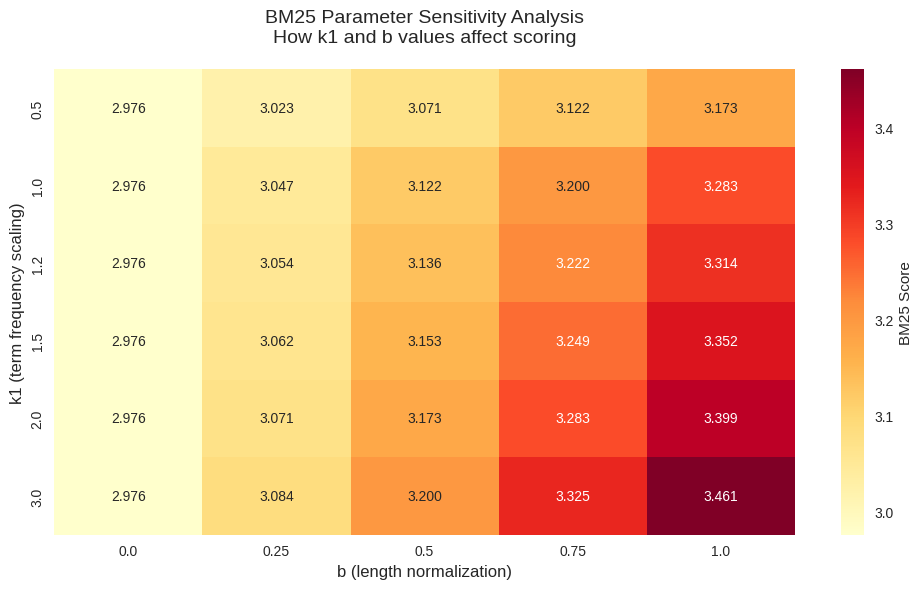


Observations:
  Score range: 2.976 to 3.461
  Best parameters: k1=3.0, b=1.0 (score: 3.461)
  Standard parameters: k1=1.2, b=0.75 (score: 3.222)


In [12]:
# Parameter sensitivity analysis
def parameter_sensitivity_analysis(query, doc_idx):
    """
    Analyze how k1 and b parameters affect BM25 scoring.
    """
    k1_values = [0.5, 1.0, 1.2, 1.5, 2.0, 3.0]
    b_values = [0.0, 0.25, 0.5, 0.75, 1.0]
    
    results = []
    
    for k1 in k1_values:
        for b in b_values:
            # Create BM25 with specific parameters
            bm25_test = BM25Calculator(k1=k1, b=b)
            bm25_test.fit(sample_documents)
            
            score = bm25_test.calculate_bm25_score(query, doc_idx)
            results.append({'k1': k1, 'b': b, 'score': score})
    
    return pd.DataFrame(results)

# Test with our sample query and top document
sensitivity_data = parameter_sensitivity_analysis(test_query, top_doc_idx)

print("Parameter Sensitivity Analysis:")
print(f"Query: '{test_query}'")
print(f"Document: {sample_documents[top_doc_idx][:60]}...")
print()

# Create pivot table for heatmap
pivot_data = sensitivity_data.pivot(index='k1', columns='b', values='score')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap='YlOrRd', 
            cbar_kws={'label': 'BM25 Score'})
plt.title('BM25 Parameter Sensitivity Analysis\nHow k1 and b values affect scoring', 
          fontsize=14, pad=20)
plt.xlabel('b (length normalization)', fontsize=12)
plt.ylabel('k1 (term frequency scaling)', fontsize=12)
plt.tight_layout()
plt.show()

# Analysis
print(f"\nObservations:")
max_score = sensitivity_data['score'].max()
min_score = sensitivity_data['score'].min()
best_params = sensitivity_data.loc[sensitivity_data['score'].idxmax()]

print(f"  Score range: {min_score:.3f} to {max_score:.3f}")
print(f"  Best parameters: k1={best_params['k1']}, b={best_params['b']} (score: {best_params['score']:.3f})")
print(f"  Standard parameters: k1=1.2, b=0.75 (score: {sensitivity_data[(sensitivity_data['k1']==1.2) & (sensitivity_data['b']==0.75)]['score'].iloc[0]:.3f})")

In [13]:
# Analyze effect of document length on scoring
def document_length_analysis():
    """
    Show how BM25 handles documents of different lengths.
    """
    # Create documents with different lengths but similar content
    base_content = "machine learning algorithms"
    length_test_docs = [
        base_content,  # Short
        base_content + " are used in data science",  # Medium  
        base_content + " are used in data science and artificial intelligence applications",  # Long
        base_content + " are used in data science and artificial intelligence applications for pattern recognition and predictive modeling tasks",  # Very long
    ]
    
    # Test with different b values
    b_test_values = [0.0, 0.5, 0.75, 1.0]
    query_test = "machine learning algorithms"
    
    print("Document Length Analysis:")
    print(f"Query: '{query_test}'")
    print("\nTest documents:")
    for i, doc in enumerate(length_test_docs):
        print(f"  Doc {i+1} ({len(doc.split()):2d} words): {doc}")
    
    print(f"\n{'b value':<8} | {'Doc 1':<8} | {'Doc 2':<8} | {'Doc 3':<8} | {'Doc 4':<8} | {'Description':<20}")
    print("-" * 70)
    
    for b_val in b_test_values:
        bm25_test = BM25Calculator(k1=1.2, b=b_val)
        bm25_test.fit(length_test_docs)
        
        scores = [bm25_test.calculate_bm25_score(query_test, i) for i in range(4)]
        
        if b_val == 0.0:
            desc = "No length penalty"
        elif b_val == 1.0:
            desc = "Full length penalty"
        else:
            desc = f"Partial penalty ({b_val})"
            
        print(f"{b_val:<8} | {scores[0]:<8.3f} | {scores[1]:<8.3f} | {scores[2]:<8.3f} | {scores[3]:<8.3f} | {desc:<20}")
    
    print("\nInterpretation:")
    print("  - b=0.0: No length normalization, longer docs may score higher")
    print("  - b=1.0: Full length normalization, shorter docs preferred")
    print("  - b=0.75: Balanced approach (standard parameter)")

document_length_analysis()

Document Length Analysis:
Query: 'machine learning algorithms'

Test documents:
  Doc 1 ( 3 words): machine learning algorithms
  Doc 2 ( 8 words): machine learning algorithms are used in data science
  Doc 3 (12 words): machine learning algorithms are used in data science and artificial intelligence applications
  Doc 4 (19 words): machine learning algorithms are used in data science and artificial intelligence applications for pattern recognition and predictive modeling tasks

b value  | Doc 1    | Doc 2    | Doc 3    | Doc 4    | Description         
----------------------------------------------------------------------
0.0      | -6.592   | -6.592   | -6.592   | -6.592   | No length penalty   
0.5      | -8.186   | -7.049   | -6.344   | -5.400   | Partial penalty (0.5)
0.75     | -9.313   | -7.303   | -6.228   | -4.952   | Partial penalty (0.75)
1.0      | -10.799  | -7.576   | -6.115   | -4.573   | Full length penalty 

Interpretation:
  - b=0.0: No length normalization, longer do

## Hybrid Search with BM25

Let's demonstrate how BM25 is used in modern hybrid search systems:

In [14]:
class HybridSearchDemo:
    """
    Simplified demonstration of hybrid search combining BM25 with vector similarity.
    """
    
    def __init__(self, documents: List[str], alpha: float = 0.5):
        """
        Initialize hybrid search.
        
        Args:
            documents: List of documents
            alpha: Balance between BM25 (0.0) and vector search (1.0)
        """
        self.documents = documents
        self.alpha = alpha
        
        # Initialize BM25
        self.bm25 = BM25Calculator()
        self.bm25.fit(documents)
        
        # Initialize simple vector similarity (using TF-IDF as proxy)
        if tfidf_available:
            self.tfidf = TFIDFCalculator()
            self.tfidf.fit(documents)
    
    def hybrid_search(self, query: str, top_k: int = 5) -> List[Tuple[int, str, float, float, float]]:
        """
        Perform hybrid search combining BM25 and vector similarity.
        
        Returns:
            List of (doc_idx, document, bm25_score, vector_score, hybrid_score)
        """
        results = []
        
        # Get BM25 scores
        bm25_scores = {}
        for i in range(len(self.documents)):
            bm25_scores[i] = self.bm25.calculate_bm25_score(query, i)
        
        # Normalize BM25 scores to [0, 1]
        max_bm25 = max(bm25_scores.values()) if bm25_scores.values() else 1.0
        if max_bm25 > 0:
            bm25_scores = {k: v / max_bm25 for k, v in bm25_scores.items()}
        
        # Get vector similarity scores (if available)
        vector_scores = {}
        if tfidf_available:
            query_vector = self.tfidf.calculate_tfidf_vector(query)
            
            for i, doc in enumerate(self.documents):
                doc_vector = self.tfidf.calculate_tfidf_vector(doc)
                
                # Calculate cosine similarity
                common_terms = set(query_vector.keys()) & set(doc_vector.keys())
                if common_terms:
                    dot_product = sum(query_vector[term] * doc_vector[term] for term in common_terms)
                    query_norm = math.sqrt(sum(score**2 for score in query_vector.values()))
                    doc_norm = math.sqrt(sum(score**2 for score in doc_vector.values()))
                    similarity = dot_product / (query_norm * doc_norm) if query_norm and doc_norm else 0.0
                else:
                    similarity = 0.0
                
                vector_scores[i] = similarity
        else:
            # Fallback: use normalized BM25 as proxy for vector scores
            vector_scores = bm25_scores.copy()
        
        # Calculate hybrid scores
        for i in range(len(self.documents)):
            bm25_score = bm25_scores[i]
            vector_score = vector_scores[i]
            
            # Hybrid score: weighted combination
            hybrid_score = (1 - self.alpha) * bm25_score + self.alpha * vector_score
            
            results.append((i, self.documents[i], bm25_score, vector_score, hybrid_score))
        
        # Sort by hybrid score
        results.sort(key=lambda x: x[4], reverse=True)
        
        return results[:top_k]

# Demonstrate hybrid search with different alpha values
print("Hybrid Search Demonstration:")
print("=" * 50)

test_query_hybrid = "python programming data science"
print(f"Query: '{test_query_hybrid}'")
print()

# Test different alpha values
alpha_values = [0.0, 0.25, 0.5, 0.75, 1.0]
alpha_descriptions = [
    "Pure BM25",
    "BM25-weighted", 
    "Balanced",
    "Vector-weighted",
    "Pure Vector"
]

for alpha, desc in zip(alpha_values, alpha_descriptions):
    print(f"\nAlpha = {alpha} ({desc}):")
    print("-" * 40)
    
    hybrid = HybridSearchDemo(sample_documents, alpha=alpha)
    results = hybrid.hybrid_search(test_query_hybrid, top_k=3)
    
    for rank, (doc_idx, document, bm25_score, vector_score, hybrid_score) in enumerate(results, 1):
        print(f"{rank}. [Doc {doc_idx+1}] Hybrid: {hybrid_score:.3f} (BM25: {bm25_score:.3f}, Vector: {vector_score:.3f})")
        print(f"   {document[:60]}...")

Hybrid Search Demonstration:
Query: 'python programming data science'


Alpha = 0.0 (Pure BM25):
----------------------------------------
1. [Doc 7] Hybrid: 1.000 (BM25: 1.000, Vector: 0.424)
   Python is a popular programming language for data science ma...
2. [Doc 5] Hybrid: 0.679 (BM25: 0.679, Vector: 0.277)
   Data science combines statistics programming and domain know...
3. [Doc 10] Hybrid: 0.538 (BM25: 0.538, Vector: 0.176)
   Web development frameworks like Django and Flask enable rapi...

Alpha = 0.25 (BM25-weighted):
----------------------------------------
1. [Doc 7] Hybrid: 0.856 (BM25: 1.000, Vector: 0.424)
   Python is a popular programming language for data science ma...
2. [Doc 5] Hybrid: 0.579 (BM25: 0.679, Vector: 0.277)
   Data science combines statistics programming and domain know...
3. [Doc 10] Hybrid: 0.448 (BM25: 0.538, Vector: 0.176)
   Web development frameworks like Django and Flask enable rapi...

Alpha = 0.5 (Balanced):
-------------------------------------

## Visualization and Performance Analysis

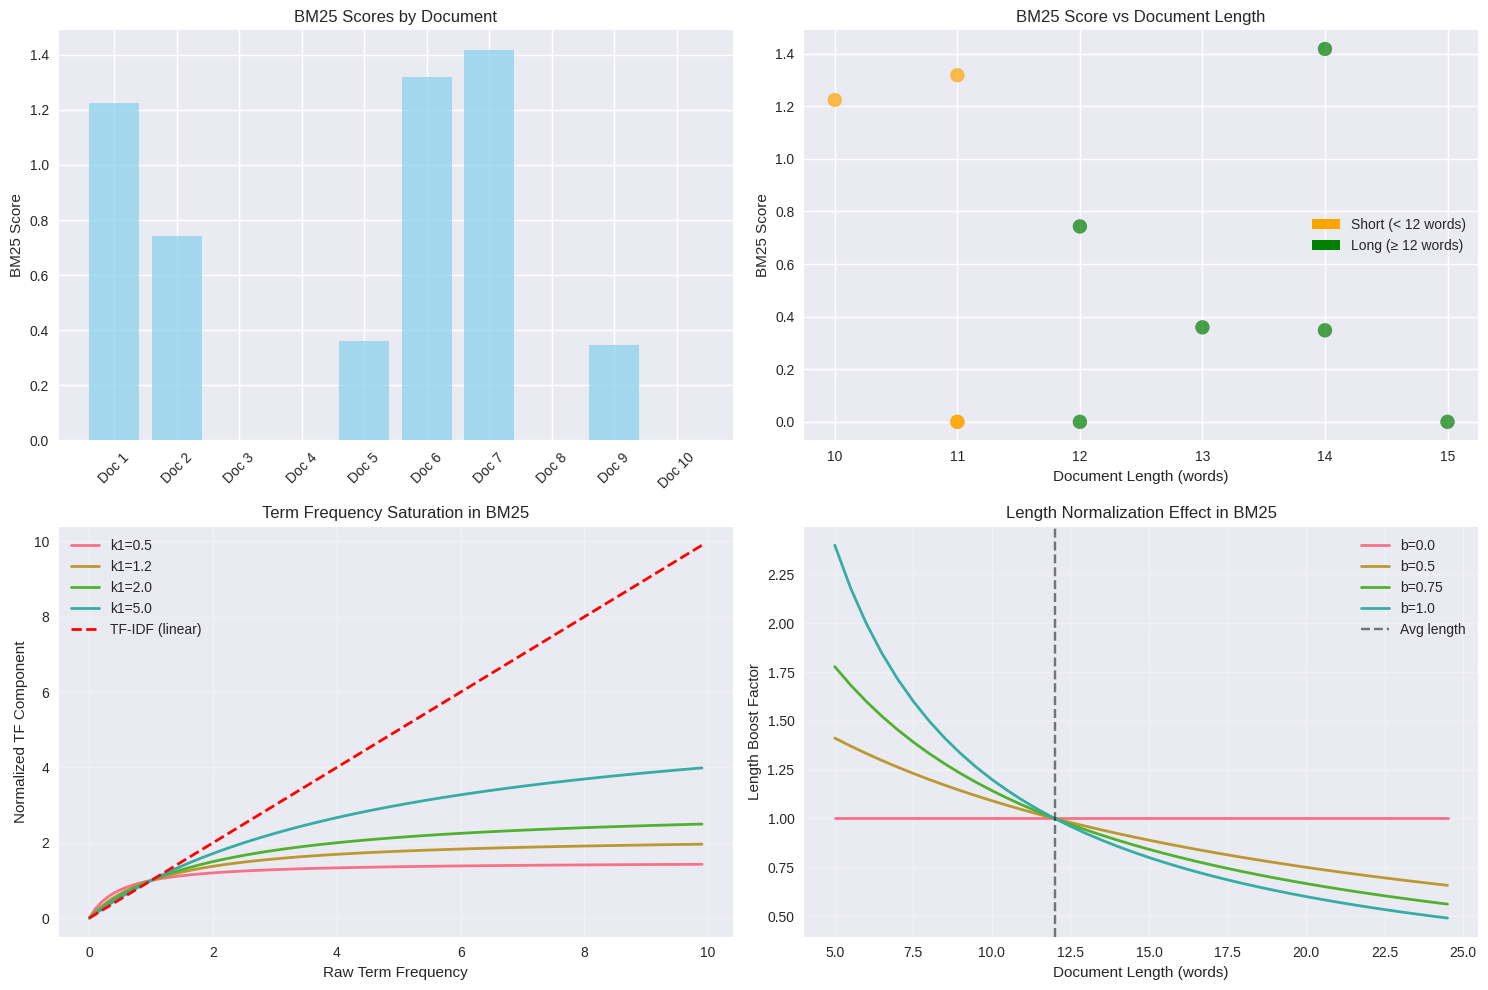


BM25 Scoring Analysis:
Document  BM25_Score  Doc_Length Length_Category
   Doc 1    1.223455          10           Short
   Doc 2    0.742862          12            Long
   Doc 3    0.000000          11           Short
   Doc 4    0.000000          12            Long
   Doc 5    0.359358          13            Long
   Doc 6    1.317694          11           Short
   Doc 7    1.417446          14            Long
   Doc 8    0.000000          11           Short
   Doc 9    0.348046          14            Long
  Doc 10    0.000000          15            Long


In [15]:
# Visualize BM25 vs TF-IDF scoring patterns
def create_scoring_comparison():
    """
    Create visualizations comparing BM25 and TF-IDF scoring patterns.
    """
    
    # Test query
    comparison_query = "machine learning data"
    
    # Get scores for all documents
    doc_indices = list(range(len(sample_documents)))
    bm25_scores = [bm25.calculate_bm25_score(comparison_query, i) for i in doc_indices]
    
    # Get document lengths for analysis
    lengths = [len(doc.split()) for doc in sample_documents]
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'Document': [f"Doc {i+1}" for i in doc_indices],
        'BM25_Score': bm25_scores,
        'Doc_Length': lengths,
        'Length_Category': ['Short' if l < 12 else 'Long' for l in lengths]
    })
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. BM25 scores by document
    axes[0, 0].bar(comparison_df['Document'], comparison_df['BM25_Score'], 
                   color='skyblue', alpha=0.7)
    axes[0, 0].set_title('BM25 Scores by Document')
    axes[0, 0].set_ylabel('BM25 Score')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. BM25 score vs document length
    colors = ['orange' if cat == 'Short' else 'green' 
              for cat in comparison_df['Length_Category']]
    axes[0, 1].scatter(comparison_df['Doc_Length'], comparison_df['BM25_Score'], 
                       c=colors, alpha=0.7, s=100)
    axes[0, 1].set_title('BM25 Score vs Document Length')
    axes[0, 1].set_xlabel('Document Length (words)')
    axes[0, 1].set_ylabel('BM25 Score')
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='orange', label='Short (< 12 words)'),
                       Patch(facecolor='green', label='Long (≥ 12 words)')]
    axes[0, 1].legend(handles=legend_elements)
    
    # 3. Term frequency saturation demo
    tf_values = np.arange(0, 10, 0.1)
    k1_vals = [0.5, 1.2, 2.0, 5.0]
    
    for k1 in k1_vals:
        # BM25 term frequency component: tf * (k1 + 1) / (tf + k1)
        bm25_tf = tf_values * (k1 + 1) / (tf_values + k1)
        axes[1, 0].plot(tf_values, bm25_tf, label=f'k1={k1}', linewidth=2)
    
    # Compare with linear TF-IDF
    axes[1, 0].plot(tf_values, tf_values, '--', color='red', 
                    label='TF-IDF (linear)', linewidth=2)
    
    axes[1, 0].set_title('Term Frequency Saturation in BM25')
    axes[1, 0].set_xlabel('Raw Term Frequency')
    axes[1, 0].set_ylabel('Normalized TF Component')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Length normalization effect
    doc_lengths = np.arange(5, 25, 0.5)
    avg_length = 12  # approximate
    b_vals = [0.0, 0.5, 0.75, 1.0]
    
    for b in b_vals:
        # Length normalization: 1 - b + b * (|D| / avgdl)
        length_norm = 1 - b + b * (doc_lengths / avg_length)
        axes[1, 1].plot(doc_lengths, 1/length_norm, label=f'b={b}', linewidth=2)
    
    axes[1, 1].axvline(x=avg_length, color='black', linestyle='--', alpha=0.5, 
                       label='Avg length')
    axes[1, 1].set_title('Length Normalization Effect in BM25')
    axes[1, 1].set_xlabel('Document Length (words)')
    axes[1, 1].set_ylabel('Length Boost Factor')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df

# Create the comparison visualization
comparison_data = create_scoring_comparison()

print("\nBM25 Scoring Analysis:")
print(comparison_data[['Document', 'BM25_Score', 'Doc_Length', 'Length_Category']].to_string(index=False))

## Summary: BM25 Key Insights and Best Practices

### Key Insights from Our Analysis:

1. **Term Frequency Saturation**: Unlike TF-IDF's linear relationship, BM25 provides diminishing returns for repeated terms
2. **Length Normalization**: BM25 prevents bias toward longer documents through the `b` parameter
3. **Parameter Sensitivity**: `k1` and `b` can significantly affect ranking, but defaults (k1=1.2, b=0.75) work well
4. **Probabilistic Foundation**: More theoretically sound than TF-IDF's heuristic approach

### Performance Characteristics:

- **Better than TF-IDF**: Generally provides more relevant rankings
- **Document Length Handling**: Fairer scoring across different document lengths
- **Parameter Tuning**: Can be optimized for specific domains and datasets
- **Hybrid Search Ready**: Combines well with vector similarity methods

### ⚙️ Best Practices:

1. **Default Parameters**: Start with k1=1.2, b=0.75
2. **Domain Tuning**: Adjust parameters based on your document collection
3. **Preprocessing**: Consider stemming, stop word removal for better results
4. **Hybrid Approach**: Combine with semantic search for optimal retrieval

### 🔄 When to Use BM25:

**Excellent for**:
- Keyword-based search
- Document ranking and retrieval
- Legal, academic, and technical documents
- When document length varies significantly
- Hybrid search systems

**Limitations**:
- No semantic understanding
- Requires exact keyword matches
- Sensitive to document preprocessing
- May struggle with very short queries

### Modern Applications:

- **Search Engines**: Primary ranking algorithm (Google, Bing, Elasticsearch)
- **RAG Systems**: Keyword retrieval component in hybrid search
- **Document Databases**: MongoDB, Weaviate, Pinecone keyword search
- **Enterprise Search**: Internal document and knowledge base systems

In [16]:
# Final demonstration: Real-world usage example
print("Real-World BM25 Usage Example:")
print("=" * 50)

# Simulate a knowledge base search
knowledge_queries = [
    "How to implement machine learning in Python?",
    "What are the best practices for data science?", 
    "Deep learning neural network architectures",
    "Statistical analysis methods for research"
]

print("Knowledge Base Search Simulation:")
print(f"Collection: {len(sample_documents)} documents")
print(f"Average document length: {bm25.avg_doc_length:.1f} words")
print(f"Vocabulary size: {len(bm25.vocabulary)} unique terms")
print()

for i, query in enumerate(knowledge_queries, 1):
    print(f"Query {i}: '{query}'")
    results = bm25.rank_documents(query, top_k=2)
    
    for rank, (doc_idx, document, score) in enumerate(results, 1):
        print(f"  {rank}. [Score: {score:.3f}] {document[:55]}...")
    print()

print("BM25 demonstration completed!")
print("\nBM25 is now ready for use in your information retrieval systems!")

Real-World BM25 Usage Example:
Knowledge Base Search Simulation:
Collection: 10 documents
Average document length: 12.3 words
Vocabulary size: 86 unique terms

Query 1: 'How to implement machine learning in Python?'
  1. [Score: 1.318] Artificial intelligence encompasses machine learning de...
  2. [Score: 1.279] Statistical analysis helps researchers understand patte...

Query 2: 'What are the best practices for data science?'
  1. [Score: 2.095] Python is a popular programming language for data scien...
  2. [Score: 0.371] Deep learning uses neural networks to process complex d...

Query 3: 'Deep learning neural network architectures'
  1. [Score: 3.472] Deep learning uses neural networks to process complex d...
  2. [Score: 1.800] Artificial intelligence encompasses machine learning de...

Query 4: 'Statistical analysis methods for research'
  1. [Score: 3.858] Statistical analysis helps researchers understand patte...
  2. [Score: 1.747] Python is a popular programming language for